In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data into memory
data_set_train = np.genfromtxt("hw04_data_set_train.csv", delimiter = ",")
data_set_test = np.genfromtxt("hw04_data_set_test.csv", delimiter = ",")


In [3]:
# get x and y values
x_train = data_set_train[:, 0]
y_train = data_set_train[:, 1]
x_test = data_set_test[:, 0]
y_test = data_set_test[:, 1]

In [4]:
# set drawing parameters
minimum_value = 0.0
maximum_value = 2.0
x_interval = np.arange(start = minimum_value, stop = maximum_value + 0.002, step = 0.002)

def plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat):
    fig = plt.figure(figsize = (8, 4))
    plt.plot(x_train, y_train, "b.", markersize = 10)
    plt.plot(x_test, y_test, "r.", markersize = 10)
    plt.plot(x_interval, y_interval_hat, "k-")
    plt.xlabel("Time (sec)")
    plt.ylabel("Signal (millivolt)")
    plt.legend(["training", "test"])
    plt.show()
    return(fig)

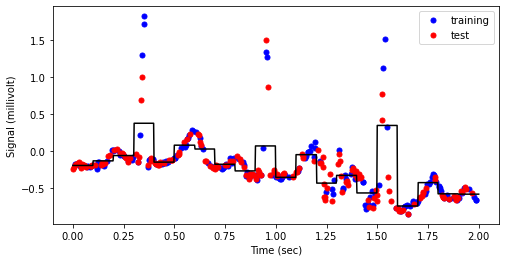

Regressogram => RMSE is 0.26623595859744437 when h is 0.1


In [5]:
# STEP 3
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def regressogram(x_query, x_train, y_train, left_borders, right_borders):
    # your implementation starts below
    y_hat = np.zeros_like(x_query)
    for i in range(len(left_borders)):
        mask = (left_borders[i] <= x_train) & (x_train <= right_borders[i])
        if np.sum(mask) > 0:
            y_hat[(left_borders[i] <= x_query) & (x_query <= right_borders[i])] = np.mean(y_train[mask])
    # your implementation ends above
    return(y_hat)
    
bin_width = 0.10
left_borders = np.arange(start = minimum_value, stop = maximum_value, step = bin_width)
right_borders = np.arange(start = minimum_value + bin_width, stop = maximum_value + bin_width, step = bin_width)

y_interval_hat = regressogram(x_interval, x_train, y_train, left_borders, right_borders)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("regressogram.pdf", bbox_inches = "tight")

y_test_hat = regressogram(x_test, x_train, y_train, left_borders, right_borders)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Regressogram => RMSE is {} when h is {}".format(rmse, bin_width))

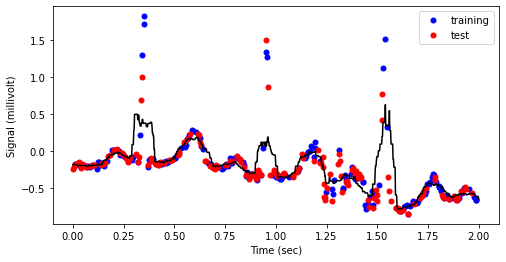

Running Mean Smoother => RMSE is 0.24334170557116422 when h is 0.1


In [6]:
# STEP 4
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def running_mean_smoother(x_query, x_train, y_train, bin_width):
    # your implementation starts below
    y_hat = np.zeros_like(x_query)
    for i, xq in enumerate(x_query):
        within_width = (x_train >= (xq - bin_width/2)) & (x_train <= (xq + bin_width/2))
        if np.any(within_width):
            weights = ((np.abs(x_train[within_width] - xq)) / bin_width) <= 1/2
            y_hat[i] = np.sum(y_train[within_width] * weights) / np.sum(weights)
    # your implementation ends above
    return(y_hat)

bin_width = 0.10

y_interval_hat = running_mean_smoother(x_interval, x_train, y_train, bin_width)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("running_mean_smoother.pdf", bbox_inches = "tight")

y_test_hat = running_mean_smoother(x_test, x_train, y_train, bin_width)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Running Mean Smoother => RMSE is {} when h is {}".format(rmse, bin_width))

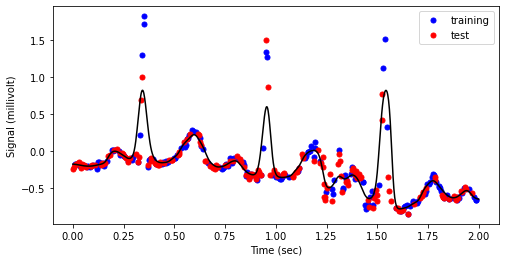

Kernel Smoother => RMSE is 0.19807741439132479 when h is 0.02


In [7]:
# STEP 5
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def kernel_smoother(x_query, x_train, y_train, bin_width):
    # your implementation starts below
    def gaussian_kernel(u):
        return 1.0/np.sqrt(2*np.pi) * np.exp(-0.5*u**2)
    
    y_hat = np.zeros_like(x_query)
    for i in range(len(x_query)):
        kernel_sum = 0
        weighted_sum = 0
        for j in range(len(x_train)):
            kernel = gaussian_kernel((x_query[i]-x_train[j])/bin_width)
            kernel_sum += kernel
            weighted_sum += kernel*y_train[j]
        y_hat[i] = weighted_sum/kernel_sum
    # your implementation ends above
    return(y_hat)

bin_width = 0.02

y_interval_hat = kernel_smoother(x_interval, x_train, y_train, bin_width)
fig = plot_figure(x_train, y_train, x_test, y_test, x_interval, y_interval_hat)
fig.savefig("kernel_smoother.pdf", bbox_inches = "tight")

y_test_hat = kernel_smoother(x_test, x_train, y_train, bin_width)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("Kernel Smoother => RMSE is {} when h is {}".format(rmse, bin_width))